# Set Up

## Imports

In [1]:
import sys
sys.path.append('/home/wkocin/projects/ancient_nlp/')

In [2]:
from pathlib import Path 

In [3]:
import xml.etree.ElementTree as ET

In [4]:
from xml_parser import parse_perseus_xml

In [23]:
import matplotlib.pyplot as plt

In [29]:
import collections

In [34]:
import pandas as pd

## Paths

In [5]:
project_path = Path('/home/wkocin/projects/ancient_nlp/')

In [6]:
data_path = project_path / 'data'

# XML parser

In [7]:
corpus = parse_perseus_xml(xml_file_path= data_path / 'gallic_wars_j_ceasar.xml')

In [8]:
corpus[0:100]

'All  Gaul  is divided into three parts, one of which the  Belgae  inhabit, the  Aquitani            '

# Ideas

**possible goals:**
1. topic modelling
2. text summary
3. information extraction
4. relations between extracted elements:

**possible approaches to modelling**
* CFG (context free grammar)
* NN (neural network)
    - transformers
    - autoencoders

# action plan 

**IDEA:** information extraction pipeline:
- preprocess
- show statistics of words in different categories and compare
- show statistics of words 
- map extracted geographical names on a map 
- map extracted events on timelline
- compare documents based on extracted information 

**INFORMATION TO EXTRACT:**
- people
- geographical locations
- tribes
- events
- time indicators

# Preprocessing

**goal**: tag nouns and group them 

**steps**
1. segmentation
2. tokenization
3. POS tagging
4. NER (named entity recognition)
5. coreference resolution
6. *result type*: data frame of words (roots), their types and their frequency in text

**details**
1. named entity recognition
    - ...
2. coreference resolution 
    - ...

**analysis outline**
- histograms of POSs
- hsitograms of words in each group
- map geographical names onto a map
- create timeline

## NLTK

In [123]:
# external modules
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [124]:
# internal modules
from ner_nltk import preprocess, extract_lables

In [75]:
# nltk.download('punkt') # necessery for running nltk.word_tokenize()
# nltk.download('averaged_perceptron_tagger') # necessery for running nltk.pos_tag()
# nltk.download('maxent_ne_chunker') # necessery for running nltk.ne_chunk()
# nltk.download('words') # necessery for running nltk.ne_chunk()

### functions

### tokenization and POS tagging

In [13]:
test_corpus = corpus[:1268]

In [65]:
tagged_corpus = preprocess(test_corpus)

In [119]:
tagged_corpus

[('All', 'DT'),
 ('Gaul', 'NNP'),
 ('is', 'VBZ'),
 ('divided', 'VBN'),
 ('into', 'IN'),
 ('three', 'CD'),
 ('parts', 'NNS'),
 (',', ','),
 ('one', 'CD'),
 ('of', 'IN'),
 ('which', 'WDT'),
 ('the', 'DT'),
 ('Belgae', 'NNP'),
 ('inhabit', 'NN'),
 (',', ','),
 ('the', 'DT'),
 ('Aquitani', 'NNP'),
 ('another', 'DT'),
 (',', ','),
 ('those', 'DT'),
 ('who', 'WP'),
 ('in', 'IN'),
 ('their', 'PRP$'),
 ('own', 'JJ'),
 ('language', 'NN'),
 ('are', 'VBP'),
 ('called', 'VBN'),
 ('Celts', 'NNP'),
 (',', ','),
 ('in', 'IN'),
 ('our', 'PRP$'),
 ('Gauls', 'NNP'),
 (',', ','),
 ('the', 'DT'),
 ('third', 'JJ'),
 ('.', '.'),
 ('All', 'PDT'),
 ('these', 'DT'),
 ('differ', 'VBP'),
 ('from', 'IN'),
 ('each', 'DT'),
 ('other', 'JJ'),
 ('in', 'IN'),
 ('language', 'NN'),
 (',', ','),
 ('customs', 'NNS'),
 ('and', 'CC'),
 ('laws', 'NNS'),
 ('.', '.'),
 ('The', 'DT'),
 ('river', 'NN'),
 ('Garonne', 'NNP'),
 ('separates', 'VBZ'),
 ('the', 'DT'),
 ('Gauls', 'NNP'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('Aquitani', '

Quantifying parts of speech in corpus

In [53]:
pos_in_corpus = pd.DataFrame(tagged_corpus, columns=['word', 'tag'])

<Axes: >

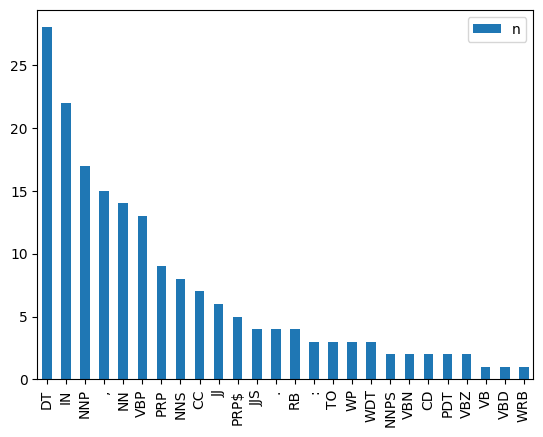

In [58]:
# graphic representation of number of POS tags
pos_counted = collections.Counter(pos_in_corpus['tag'])
pos_counted_df = (
    pd.DataFrame.
    from_dict(pos_counted, orient='index', columns=['n']).
    sort_values(by='n', ascending=False)
)
pos_df.plot(kind='bar')

**selection of useful POS:**

- **NNP**: noun, proper, singular
- **NN**: noun, common, singular or mass
- **NNS**: noun, common, plural
- **JJ**: adjective or numeral, ordinal
- **NNPS**: Proper noun, plural
- **CD**: numeral, cardinal


(based on: https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk)

### chunking

Basic pattern of *noun phrase*

In [62]:
base_pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [67]:
cp = nltk.RegexpParser(base_pattern)
cs = cp.parse(preprocess(test_corpus))

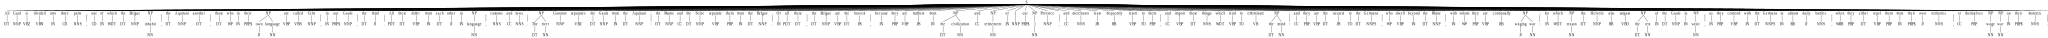

In [113]:
cs

**conclusion**: no apparent usage of parsing a text using nltk, beside graphical display.

### labeling POS

In [74]:
ne_tree = nltk.ne_chunk(preprocess(test_corpus))

In [121]:
extract_lables(ne_tree)

,words,labels
0,Belgae,GPE
1,Aquitani,ORGANIZATION
2,Celts,PERSON
3,Garonne,PERSON
4,Aquitani,GPE
5,Marne,ORGANIZATION
8,Germans,GPE
9,Rhine,GPE
10,Helvetii,ORGANIZATION


**conlusions**: 
1. Low quality categorization - most entities are  wronglycategorized 
2. Named entities present in the source text describe geographical locations and peoples which names are derived from said locations. This seem to present a challenge in correctly categorizing named entites.